# Enfoque general de Weisberg

## cargando libreria

In [1]:
library(alr4)

Loading required package: car

Loading required package: carData

Loading required package: effects

lattice theme set by effectsTheme()
See ?effectsTheme for details.



## cargando los datos

In [3]:
rentas <-read.table("Rentas mensuales.txt",header=T)

head(rentas)
Rentas <-rentas$R
Ingreso <- rentas$I
Tamano <- rentas$S

,R,I,S
,<int>,<dbl>,<int>
1,99,6.5,1
2,125,11.0,1
3,200,17.0,1
4,550,37.0,1
5,100,9.0,1
6,250,6.0,2


## grafica de dispercion

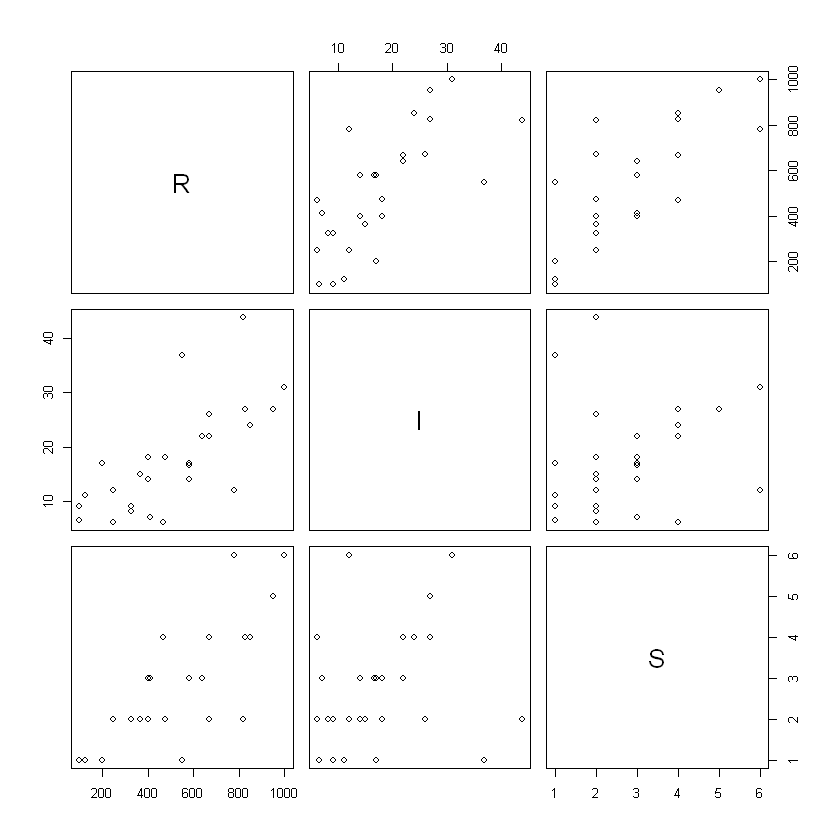

In [4]:
pairs(rentas)

## Transformacion simultanea de variables regesoras

In [5]:
powerTransform(cbind(Ingreso,Tamano)~1)
summary(powerTransform(cbind(Ingreso,Tamano)~1))
testTransform(powerTransform(cbind(Ingreso,Tamano)~1), lambda=c(0.5,0.5) )

Estimated transformation parameters 
   Ingreso     Tamano 
0.04498459 0.19872120 

bcPower Transformations to Multinormality 
        Est Power Rounded Pwr Wald Lwr Bnd Wald Upr Bnd
Ingreso    0.0450           0      -0.6285       0.7184
Tamano     0.1987           0      -0.4861       0.8835

Likelihood ratio test that transformation parameters are equal to 0
 (all log transformations)
                              LRT df    pval
LR test, lambda = (0 0) 0.3391797  2 0.84401

Likelihood ratio test that no transformations are needed
                             LRT df      pval
LR test, lambda = (1 1) 12.79498  2 0.0016657

,LRT,df,pval
,<dbl>,<int>,<chr>
"LR test, lambda = (0.5 0.5)",2.497013,2,0.28693


In [6]:
regre4 <- lm( Rentas ~ log(Ingreso) + log(Tamano) )
summary(regre4)


Call:
lm(formula = Rentas ~ log(Ingreso) + log(Tamano))

Residuals:
    Min      1Q  Median      3Q     Max 
-221.13  -27.55   12.26   48.40   89.64 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -480.86      74.42  -6.461 1.11e-06 ***
log(Ingreso)   263.16      27.36   9.620 1.04e-09 ***
log(Tamano)    310.72      28.23  11.007 7.31e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 76.25 on 24 degrees of freedom
Multiple R-squared:   0.92,	Adjusted R-squared:  0.9133 
F-statistic:   138 on 2 and 24 DF,  p-value: 6.899e-14


## Box-Cox

bcPower Transformation to Normality 
   Est Power Rounded Pwr Wald Lwr Bnd Wald Upr Bnd
Y1    0.6986           1       0.3914       1.0058

Likelihood ratio test that transformation parameter is equal to 0
 (log transformation)
                           LRT df       pval
LR test, lambda = (0) 18.27306  1 1.9139e-05

Likelihood ratio test that no transformation is needed
                           LRT df     pval
LR test, lambda = (1) 3.311458  1 0.068798

,LRT,df,pval
,<dbl>,<int>,<chr>
"LR test, lambda = (0.5)",1.643788,1,0.19981


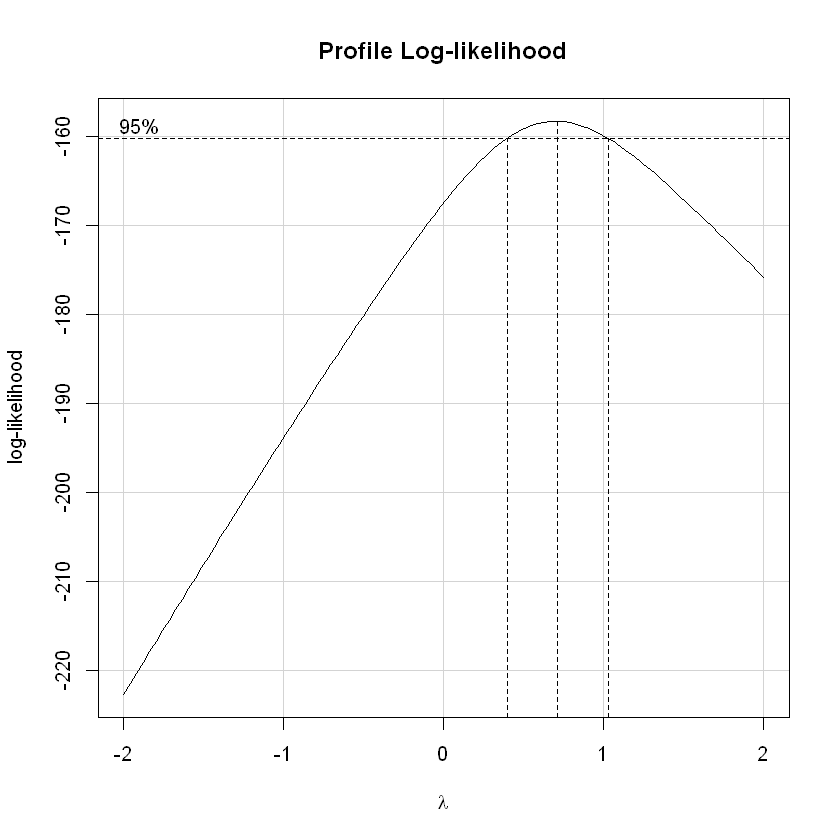

lambda,RSS
<dbl>,<dbl>
0.7117592,117927.9
-1.0000000,509389.7
0.0000000,196376.2
1.0000000,128379.5


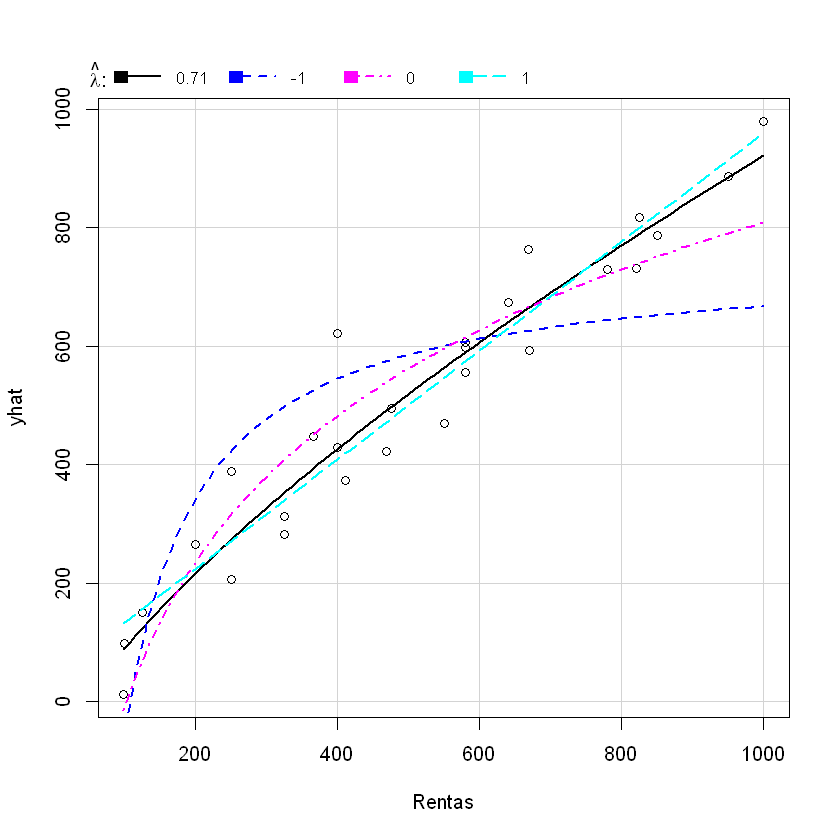

lambda,RSS
<dbl>,<dbl>
0.7117592,117927.9
0.5000000,124424.9


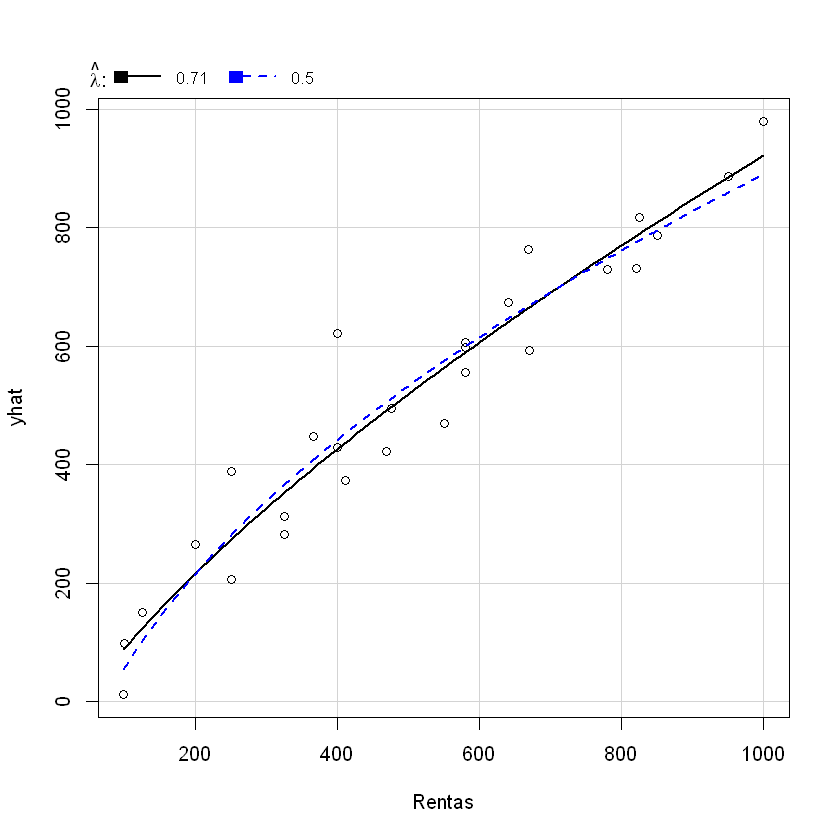

In [7]:
boxCox(regre4)
summary(powerTransform(regre4))
testTransform(powerTransform(regre4), lambda=0.5)
inverseResponsePlot(regre4)
inverseResponsePlot(regre4, lambda=0.5)

In [8]:
regre5 <- lm( sqrt(Rentas) ~ log(Ingreso) + log(Tamano) )
summary(regre5)


Call:
lm(formula = sqrt(Rentas) ~ log(Ingreso) + log(Tamano))

Residuals:
    Min      1Q  Median      3Q     Max 
-4.4231 -1.2421  0.1882  1.1706  3.0522 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -1.5179     1.7432  -0.871    0.393    
log(Ingreso)   6.0699     0.6408   9.472  1.4e-09 ***
log(Tamano)    7.6432     0.6613  11.559  2.7e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.786 on 24 degrees of freedom
Multiple R-squared:  0.923,	Adjusted R-squared:  0.9166 
F-statistic: 143.9 on 2 and 24 DF,  p-value: 4.326e-14


             Test stat Pr(>|Test stat|)   
log(Ingreso)    3.0082         0.006269 **
log(Tamano)    -0.7125         0.483310   
Tukey test     -1.2205         0.222271   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


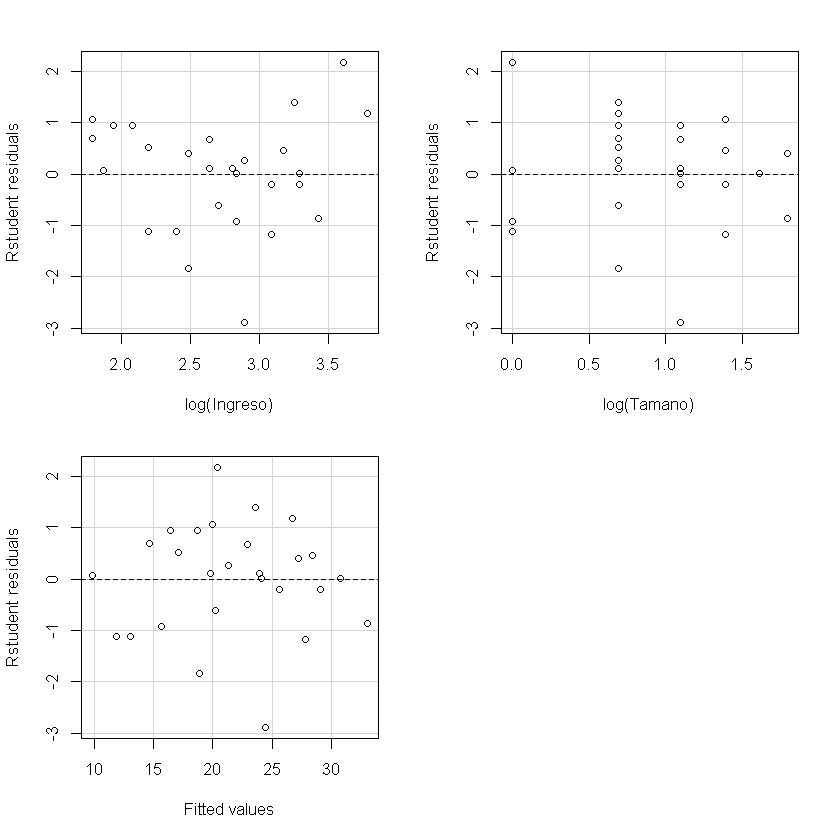

In [9]:
residualPlots(regre5, terms= ~. , type = "rstudent", quadratic=FALSE)

In [10]:
log.Ingreso2 <- (log(Ingreso))^2

In [11]:
regre6 <- lm( sqrt(Rentas) ~ log(Ingreso) + log(Tamano) + log.Ingreso2 )
summary(regre6)


Call:
lm(formula = sqrt(Rentas) ~ log(Ingreso) + log(Tamano) + log.Ingreso2)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.6987 -0.7294  0.0639  1.0628  2.3631 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   18.1115     6.6975   2.704  0.01266 *  
log(Ingreso)  -9.1544     5.0913  -1.798  0.08531 .  
log(Tamano)    7.8034     0.5747  13.578 1.81e-12 ***
log.Ingreso2   2.8098     0.9341   3.008  0.00627 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.546 on 23 degrees of freedom
Multiple R-squared:  0.9448,	Adjusted R-squared:  0.9376 
F-statistic: 131.1 on 3 and 23 DF,  p-value: 1.322e-14


             Test stat Pr(>|Test stat|)   
log(Ingreso)    0.8733         0.391943   
log(Tamano)    -1.1591         0.258841   
log.Ingreso2    0.1663         0.869466   
Tukey test     -2.6896         0.007154 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


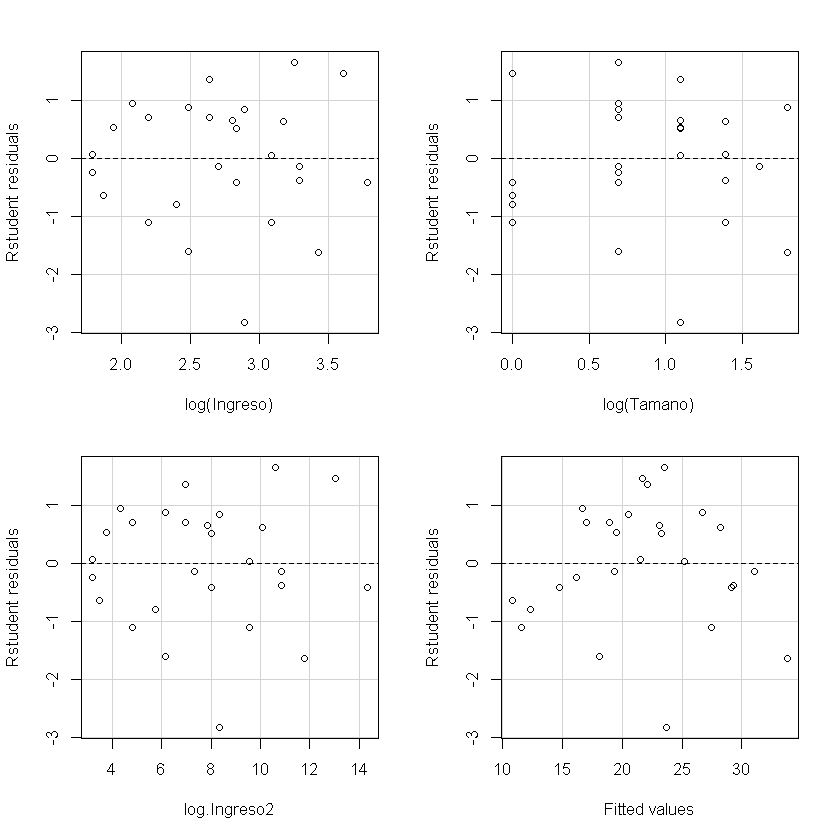

In [12]:
residualPlots(regre6, terms= ~. , type = "rstudent", quadratic=FALSE)

bcPower Transformation to Normality 
   Est Power Rounded Pwr Wald Lwr Bnd Wald Upr Bnd
Y1    1.6017           2       1.0707       2.1327

Likelihood ratio test that transformation parameter is equal to 0
 (log transformation)
                          LRT df       pval
LR test, lambda = (0) 27.4884  1 1.5804e-07

Likelihood ratio test that no transformation is needed
                           LRT df     pval
LR test, lambda = (1) 4.877486  1 0.027209

lambda,RSS
<dbl>,<dbl>
1.605605,44.20383
-1.000000,193.91685
0.000000,102.39654
1.000000,51.91148


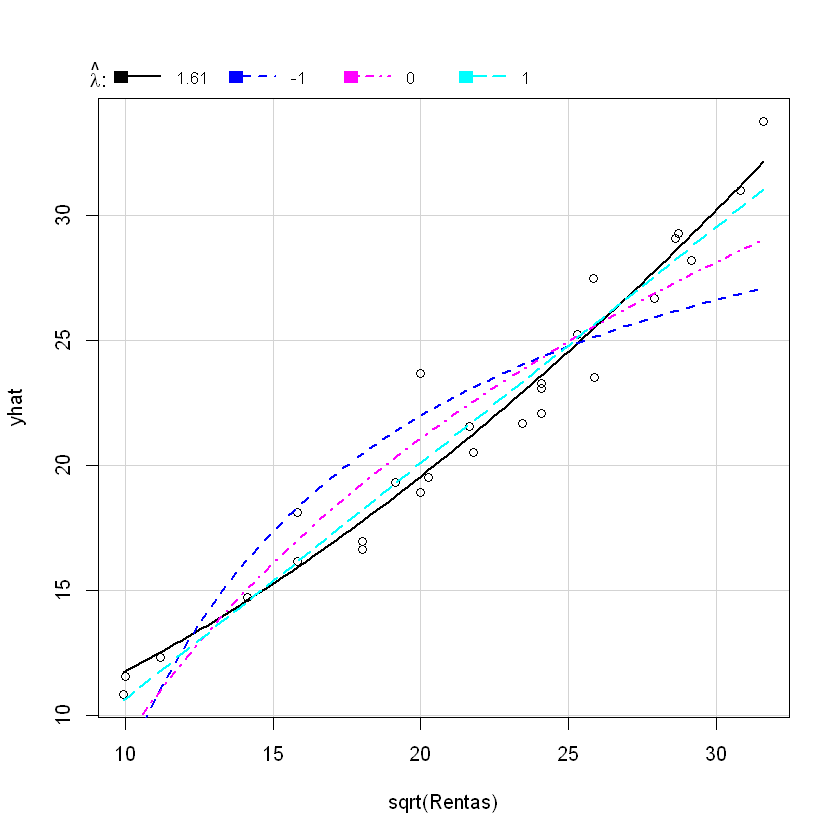

In [13]:
summary(powerTransform(regre6))
inverseResponsePlot(regre6)

In [14]:
regre7 <- lm( Rentas ~ log(Ingreso) + log(Tamano) + log.Ingreso2 )
summary(regre7)


Call:
lm(formula = Rentas ~ log(Ingreso) + log(Tamano) + log.Ingreso2)

Residuals:
    Min      1Q  Median      3Q     Max 
-184.64  -23.96   12.88   26.60   79.84 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)    507.95     262.94   1.932 0.065795 .  
log(Ingreso)  -503.75     199.88  -2.520 0.019121 *  
log(Tamano)    318.79      22.56  14.129 7.96e-13 ***
log.Ingreso2   141.54      36.67   3.860 0.000796 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 60.68 on 23 degrees of freedom
Multiple R-squared:  0.9514,	Adjusted R-squared:  0.9451 
F-statistic: 150.2 on 3 and 23 DF,  p-value: 3.018e-15


             Test stat Pr(>|Test stat|)
log(Ingreso)    1.0102           0.3234
log(Tamano)     1.1334           0.2693
log.Ingreso2    0.0883           0.9304
Tukey test      0.5230           0.6010


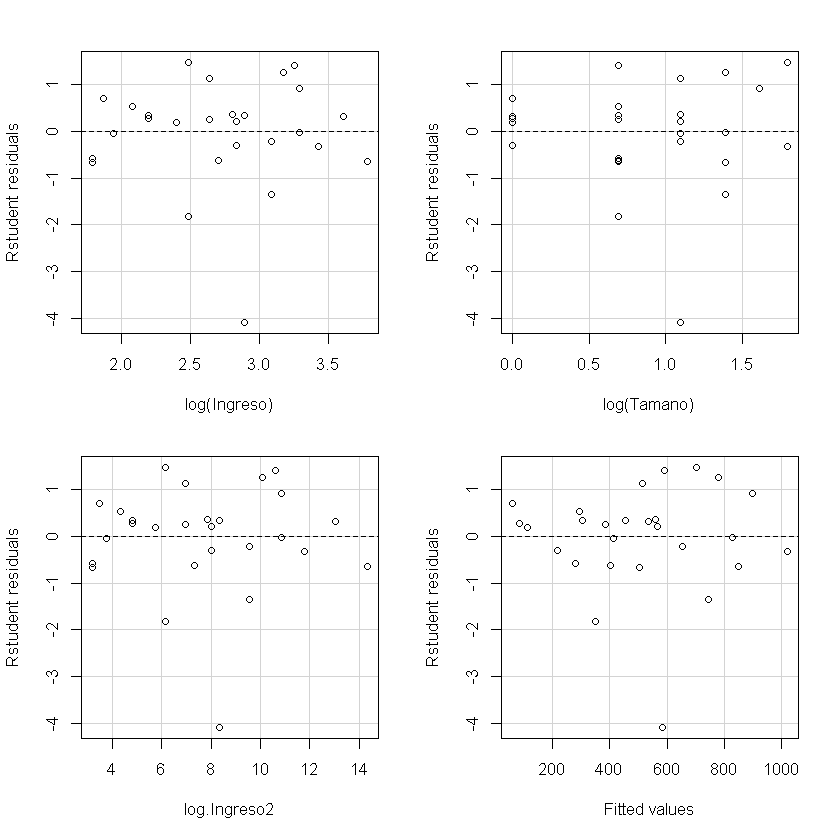

In [15]:
residualPlots(regre7, terms= ~. , type = "rstudent", quadratic=FALSE)

bcPower Transformation to Normality 
   Est Power Rounded Pwr Wald Lwr Bnd Wald Upr Bnd
Y1    0.8008           1       0.5353       1.0663

Likelihood ratio test that transformation parameter is equal to 0
 (log transformation)
                          LRT df       pval
LR test, lambda = (0) 27.4884  1 1.5804e-07

Likelihood ratio test that no transformation is needed
                           LRT df    pval
LR test, lambda = (1) 2.019334  1 0.15531

lambda,RSS
<dbl>,<dbl>
0.8380699,77231.37
-1.0000000,544980.53
0.0000000,188475.28
1.0000000,80577.38


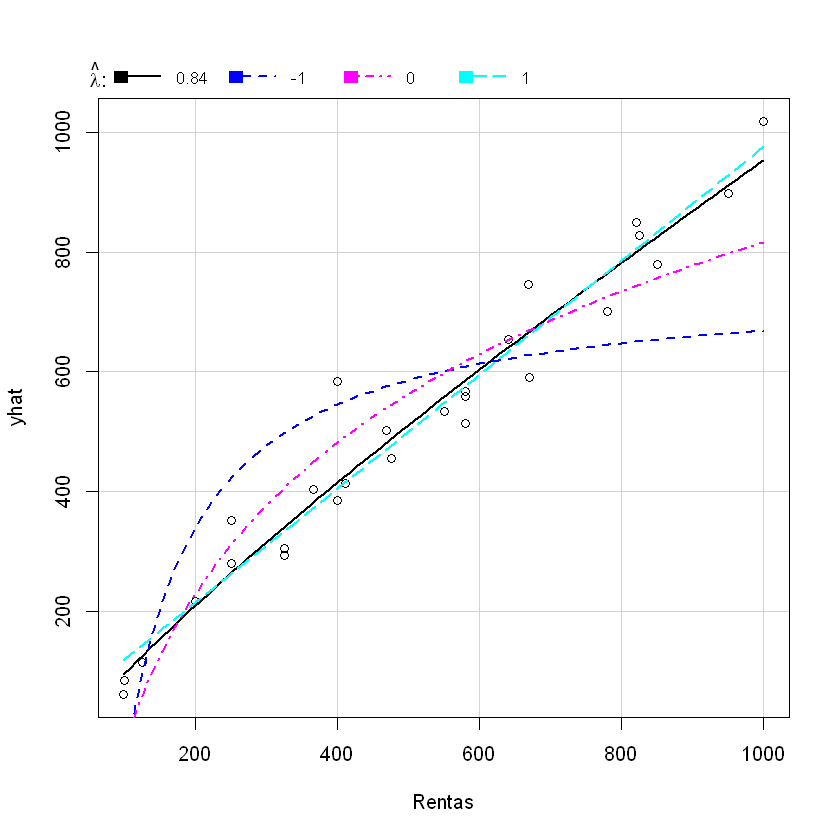

In [16]:
summary(powerTransform(regre7))
inverseResponsePlot(regre7)

## Graficas de variable agregada

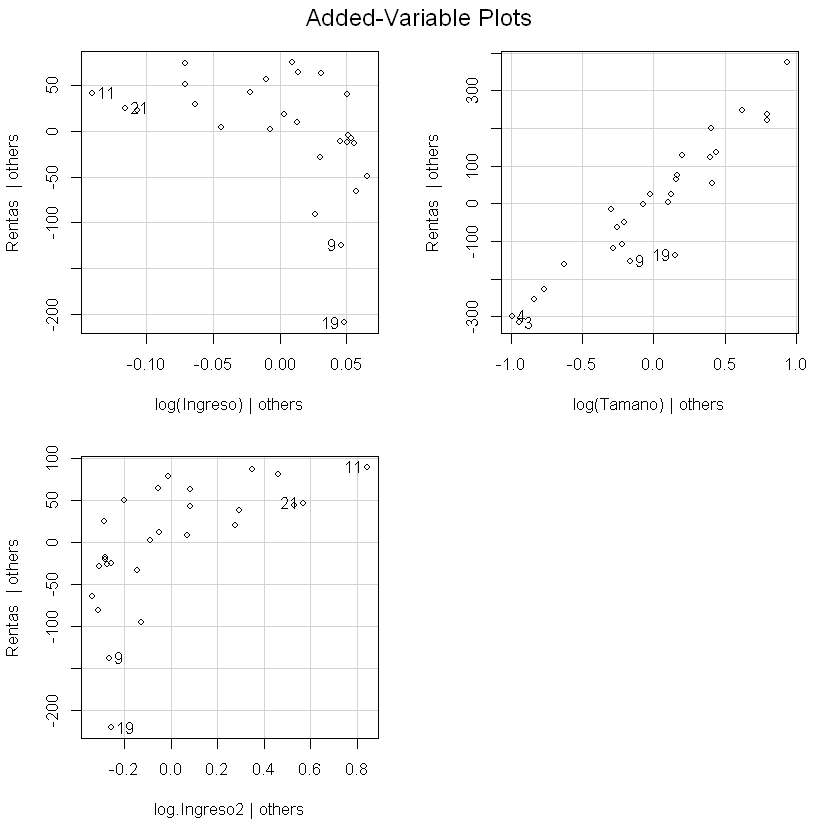

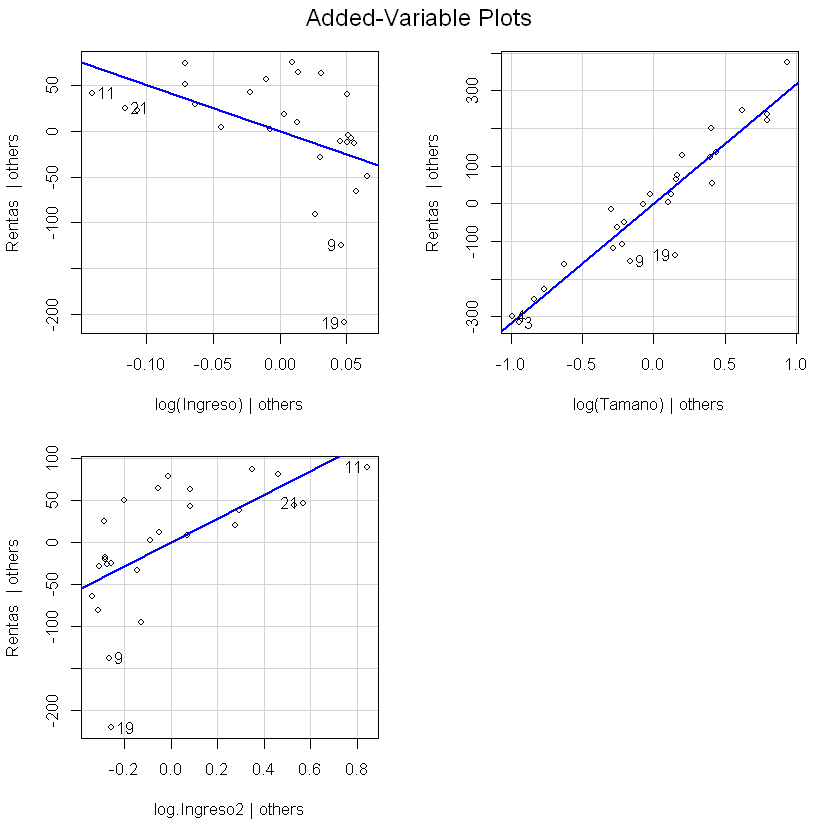

In [17]:
avPlots(regre7, lwd=-1)
avPlots(regre7)

## Graficas de modelo marginal

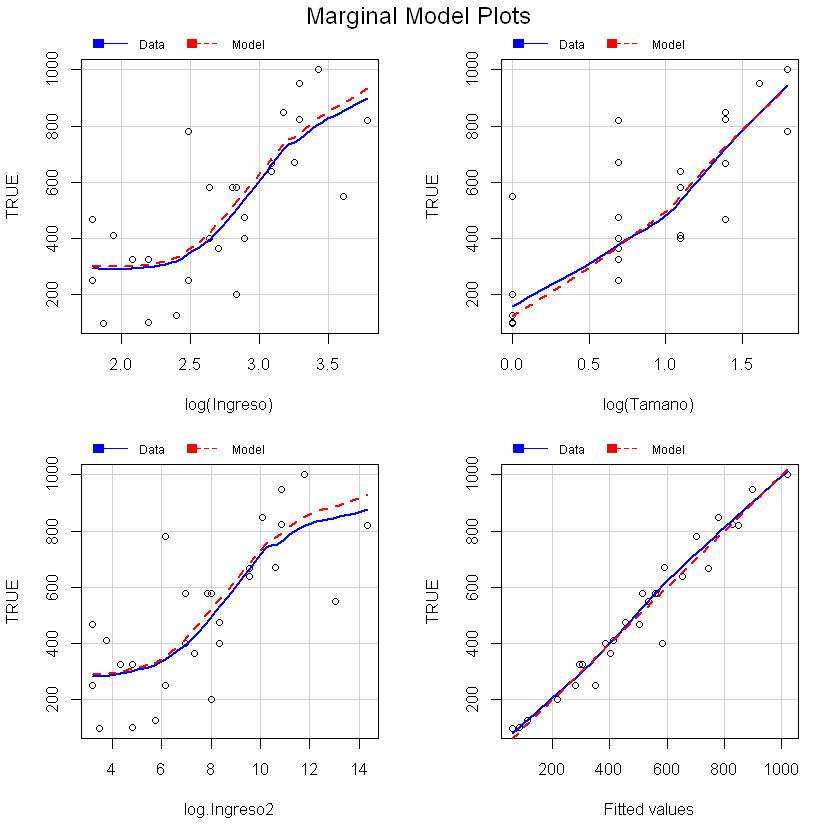

In [18]:
marginalModelPlots(regre7)

## Pruebas de homogeneidad de la varianza

In [19]:
ncvTest(regre7)
ncvTest(regre7, ~ log(Ingreso))
ncvTest(regre7, ~ log(Tamano))
ncvTest(regre7, ~ log.Ingreso2)

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 0.9737247, Df = 1, p = 0.32375

Non-constant Variance Score Test 
Variance formula: ~ log(Ingreso) 
Chisquare = 0.4256293, Df = 1, p = 0.51414

Non-constant Variance Score Test 
Variance formula: ~ log(Tamano) 
Chisquare = 1.937317, Df = 1, p = 0.16396

Non-constant Variance Score Test 
Variance formula: ~ log.Ingreso2 
Chisquare = 0.1984087, Df = 1, p = 0.65601

## Analisis de influencia

24           15           20           17            7            2 
3.750173e-05 1.321932e-04 8.979345e-04 9.374057e-04 1.314059e-03 1.938475e-03 
          14            8           18            5            3           12 
2.189477e-03 2.316173e-03 2.694176e-03 3.485791e-03 5.640832e-03 7.374991e-03 
          26           13            4           16            6           25 
7.492375e-03 8.324916e-03 1.494917e-02 2.584953e-02 2.750638e-02 3.144389e-02 
          23            1           22           10           21            9 
3.611408e-02 3.922895e-02 4.116742e-02 4.344116e-02 5.704742e-02 5.764141e-02 
          11           27           19 
9.173008e-02 1.196729e-01 1.861884e-01

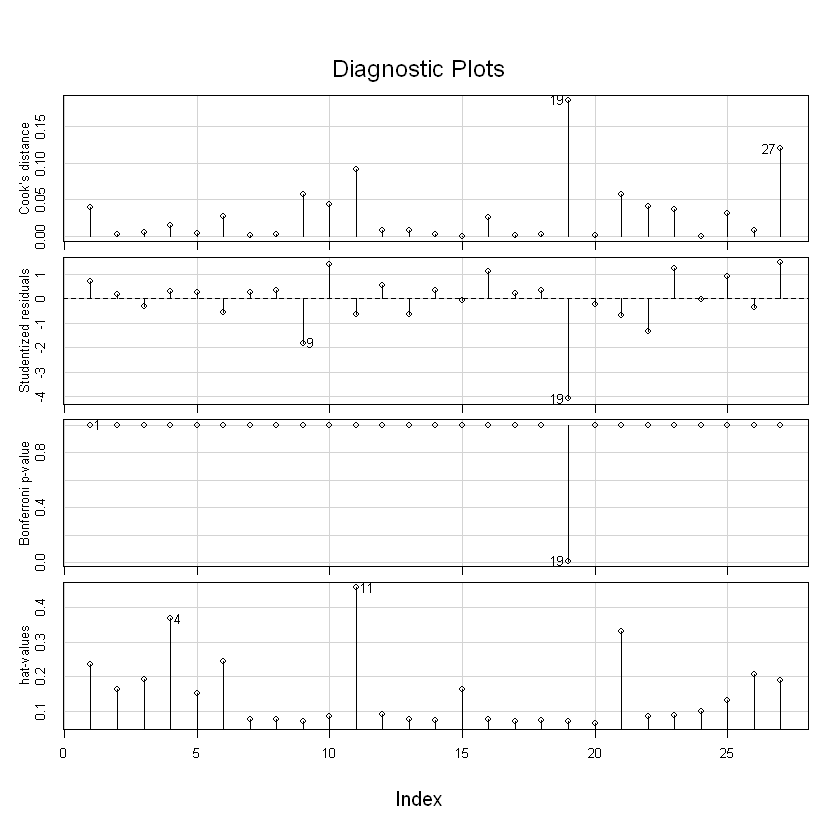

In [20]:
infIndexPlot(regre7)
sort(cooks.distance(regre7))

## Prueba sobre puntos discrepantes

In [21]:
outlierTest(regre7)

    rstudent unadjusted p-value Bonferroni p
19 -4.096017         0.00047721     0.012885

## Grafica de probabilidad normal

[1] 19  9

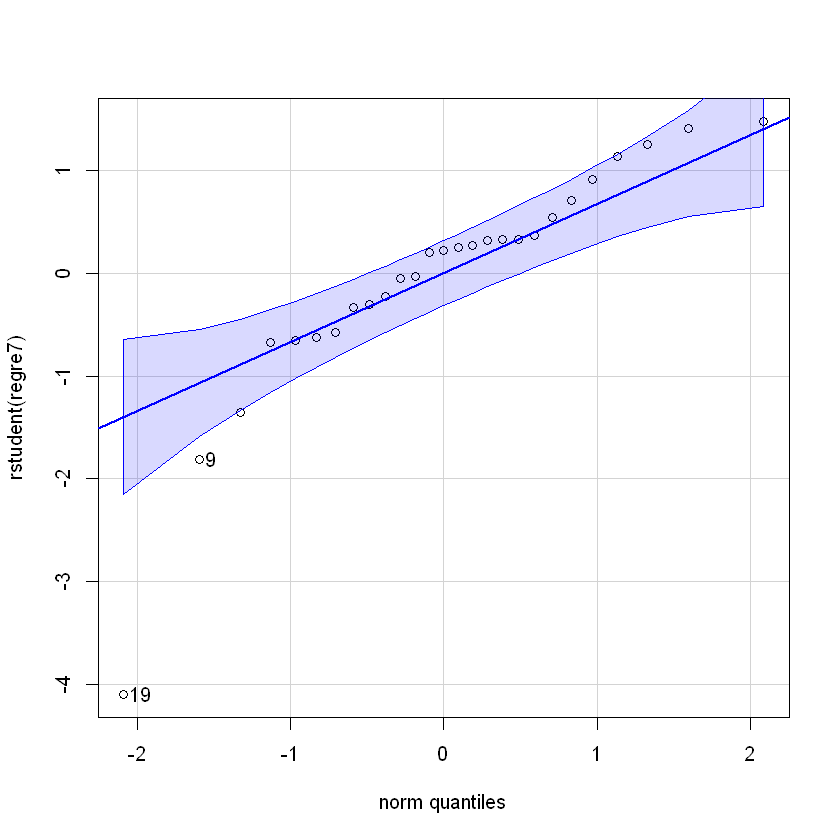

In [22]:
qqPlot(rstudent(regre7))